# **STAT 640 : Homework 5**
## Pavan Malapati
## tq8817


Import necessary libraries

In [12]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## Exercise 2.105
Use Python to compute the 0.95 quantiles of t[10],t[15],t[20].

In [3]:
df = [10, 15, 20]
q = {f"t[{d}]": stats.t.ppf(0.95, d) for d in df}

print(q)

{'t[10]': 1.8124611228107335, 't[15]': 1.7530503556925547, 't[20]': 1.7247182429207857}


## Additional Exercise 1

1: (L.L.N.) Demonstrate the Law of Large Numbers for the Normal Distribution.

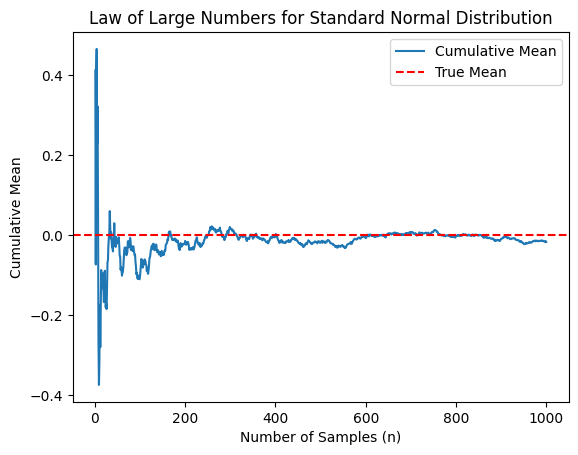

Approximate probability that |y| > 0.05: 0.078


In [4]:
# Step 1: Sample n = 1000 standard normal random values
n = 1000
z = np.random.normal(0, 1, n)

# Step 2: Define a function to compute the cumulative mean
def cumulative_mean(values):
    return np.cumsum(values) / np.arange(1, len(values) + 1)

# Step 3: Create a vector x = (1, 2, ..., n)
x = np.arange(1, n + 1)

# Step 4: Compute the cumulative mean vector y from z
y = cumulative_mean(z)

# Step 5: Approximate the probability that |y| > ε
e = 0.05
probability = np.mean(np.abs(y) > e)

# Plot the cumulative mean to visualize LLN
plt.plot(x, y, label="Cumulative Mean")
plt.axhline(0, color='red', linestyle='--', label="True Mean")
plt.xlabel("Number of Samples (n)")
plt.ylabel("Cumulative Mean")
plt.title("Law of Large Numbers for Standard Normal Distribution")
plt.legend()
plt.show()

# Output the probability
print(f"Approximate probability that |y| > {e}: {probability}")


## Additional Exercise 2

(C.L.T.) Demonstrate the Central Limit Theorem for the Normal and Exponential Distributions.

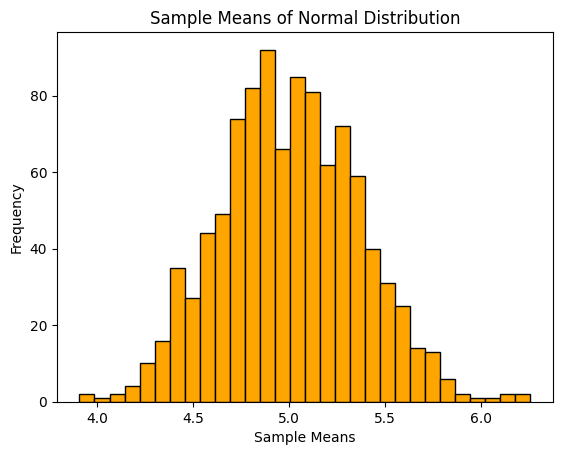

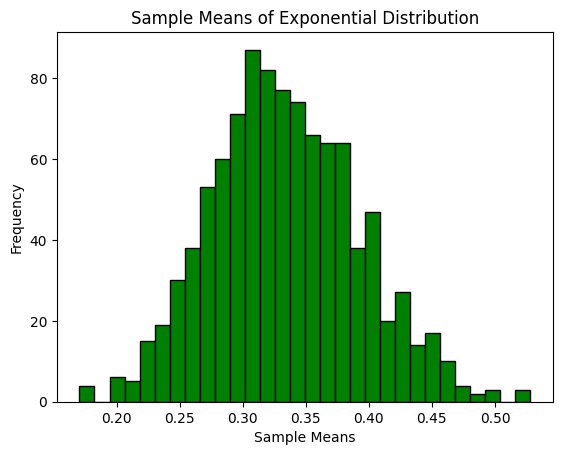

In [9]:
# Step 1: Define parameters
k = 1000
n = 30

# Step 2: Function to compute sample means
def sample_means(dist_function, size, k):
    return [np.mean(dist_function(size)) for _ in range(k)]

# Step 3: Normal Distribution
normal_means = sample_means(lambda size: np.random.normal(5, 2, size), n, k)

# Step 4: Histogram for the Normal distribution
plt.hist(normal_means, bins=30, edgecolor='black', color='orange')
plt.title("Sample Means of Normal Distribution")
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.show()

# Step 5: Exponential Distribution
exponential_means = sample_means(lambda size: np.random.exponential(1/3, size), n, k)

# Step 6: Histogram for the Exponential distribution
plt.hist(exponential_means, bins=30, edgecolor='black', color='green')
plt.title("Sample Means of Exponential Distribution")
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.show()

The histogram for the **normal distribution** is bell-shaped, indicating that the sample means follow a normal distribution as expected. The peak is centered around 5, consistent with the population mean, and the spread is moderate, with most values close to the mean, reflecting low variability. On the other hand, the histogram for the **exponential distribution** is skewed to the right, which is typical of an exponential distribution. The peak is around 0.30, lower than the normal distribution, and the spread is wider, with a long right tail, indicating higher variability. Despite the differences in shape and spread, the Central Limit Theorem (CLT) ensures that as sample size increases, both distributions' sample means will approximate a normal distribution.

## Additional Exercise 3

Demonstrate the independence of the sample mean and sample variance when sampling from the Normal (mean = 5, variance = 4).

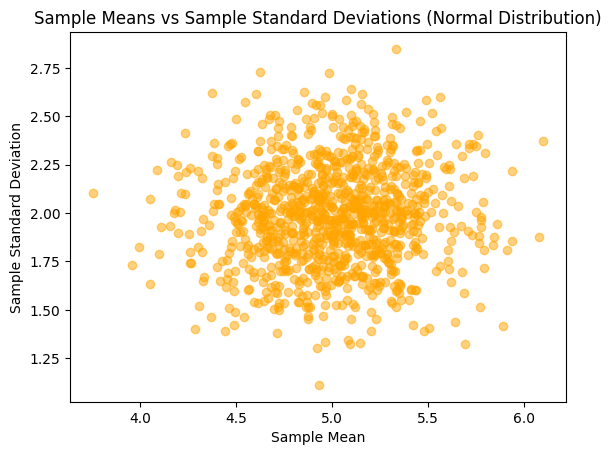

Correlation (Normal): 0.04373413638126326


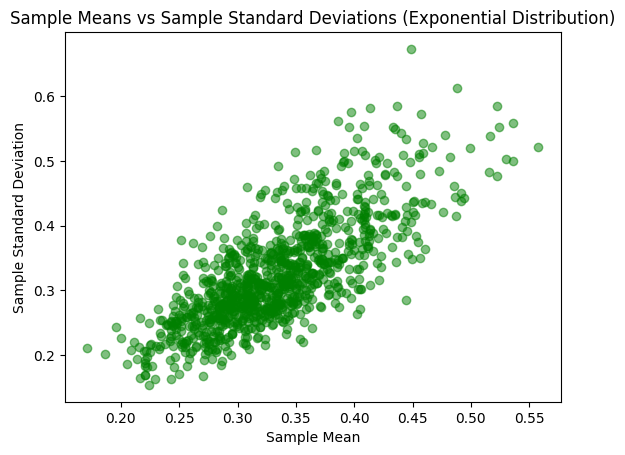

Correlation (Exponential): 0.7595213188533727


In [13]:
k = 1000
n = 30

# Step 1: Normal Distribution
normal_samples = [np.random.normal(5, 2, n) for _ in range(k)]
normal_means = [np.mean(sample) for sample in normal_samples]
normal_stds = [np.std(sample, ddof=1) for sample in normal_samples]  # Use ddof=1 for sample std

# Step 2: Sample means v/s Sample standard deviations (Normal Distribution)
plt.scatter(normal_means, normal_stds, alpha=0.5, color='orange')
plt.title('Sample Means vs Sample Standard Deviations (Normal Distribution)')
plt.xlabel('Sample Mean')
plt.ylabel('Sample Standard Deviation')
plt.show()

# Step 3: Compute correlation between sample means and standard deviations (Normal)
normal_corr, _ = pearsonr(normal_means, normal_stds)
print(f"Correlation (Normal): {normal_corr}")

# Step 4: Exponential Distribution
exp_samples = [np.random.exponential(1/3, n) for _ in range(k)]
exp_means = [np.mean(sample) for sample in exp_samples]
exp_stds = [np.std(sample, ddof=1) for sample in exp_samples]

# Step 5: Sample means v/s Sample standard deviations (Exponential)
plt.scatter(exp_means, exp_stds, alpha=0.5, color='green')
plt.title('Sample Means vs Sample Standard Deviations (Exponential Distribution)')
plt.xlabel('Sample Mean')
plt.ylabel('Sample Standard Deviation')
plt.show()

# Step 6: Compute correlation between sample means and standard deviations (Exponential)
exp_corr, _ = pearsonr(exp_means, exp_stds)
print(f"Correlation (Exponential): {exp_corr}")

In comparing the Normal and Exponential distributions, we observe that the **Normal distribution** shows a near-zero correlation (0.052), indicating no significant relationship between sample means and sample standard deviations, which is expected as they are theoretically independent. The scatter plot for the Normal distribution shows no clear pattern, supporting the absence of correlation. In contrast, the **Exponential distribution** has a much higher correlation (0.731), suggesting a moderate positive relationship between sample means and standard deviations. The scatter plot for the Exponential distribution reveals a clear upward trend, where larger sample means are associated with larger standard deviations, reflecting the distribution's inherent properties where larger values occur less frequently, leading to this dependency.